In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)
from src.database.queries import *


In [6]:
df_get_data_from_fact_vendas = get_data_from_fact_vendas()
df_get_data_from_fact_filial = get_data_from_fact_filial()
df_get_data_from_dim_brick = get_data_from_dim_brick()


# Analisando média de valores entre a coluna de concorrentes independentes, grandes concorrentes e preço popular. 
df_get_data_from_fact_vendas['media_precos'] = (df_get_data_from_fact_vendas[['venda_concorr_indep_unid','venda_grandes_concorr_unid','venda_preco_popular_unid']].mean(axis=1).round(1))

# Analisando o volume total de mercado somando as vendas dos concorrentes independentes, grandes concorrentes e preço popular (clamed).
df_get_data_from_fact_vendas['volume_total_mercado'] = (df_get_data_from_fact_vendas[['venda_concorr_indep_unid','venda_grandes_concorr_unid','venda_preco_popular_unid']].sum(axis=1).round(1))

df_get_data_from_fact_vendas['participacao_mercado_clamed'] = (df_get_data_from_fact_vendas['venda_preco_popular_unid'] /
(df_get_data_from_fact_vendas['volume_total_mercado'] - df_get_data_from_fact_vendas['venda_preco_popular_unid'])*100).round(2)

df_get_data_from_fact_vendas['participacao_mercado_grandes_concorr'] = (df_get_data_from_fact_vendas['venda_grandes_concorr_unid'] /
(df_get_data_from_fact_vendas['volume_total_mercado'] - df_get_data_from_fact_vendas['venda_grandes_concorr_unid'])*100).round(2)


df_get_data_from_fact_vendas['participacao_mercado_concorr_indep'] = (df_get_data_from_fact_vendas['venda_concorr_indep_unid'] /
(df_get_data_from_fact_vendas['volume_total_mercado'] - df_get_data_from_fact_vendas['venda_concorr_indep_unid'])*100).round(2)

df_get_data_from_fact_vendas.head()
df_get_data_from_fact_vendas.to_csv('../data/processed/fact_vendas_enriquecido.csv', index=False)

c:\Users\alanm\OneDrive\Documentos\GitHub\projeto-etl-iqvia-clamed\src\database\queries.py:81: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
c:\Users\alanm\OneDrive\Documentos\GitHub\projeto-etl-iqvia-clamed\src\database\queries.py:71: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
c:\Users\alanm\OneDrive\Documentos\GitHub\projeto-etl-iqvia-clamed\src\database\queries.py:61: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn

In [40]:
# Analisando qual região vendeu os produtos através do brick que é o código regional das filiais como não tem um id filial na tabela vendas para identificar qual filial vendeu, irei relacionar apenas pelo brick.

merged_by_idbrick = pd.merge(df_get_data_from_fact_vendas, df_get_data_from_dim_brick, left_on='fk_brick', right_on='id_brick', how='inner')

merged_by_idbrick


,ean,cod_prod_catarinense,venda_concorr_indep_unid,venda_grandes_concorr_unid,venda_preco_popular_unid,fk_brick,media_precos,volume_total_mercado,participacao_mercado_clamed,participacao_mercado_grandes_concorr,participacao_mercado_concorr_indep,id_brick,brick
0,000000032689150,0000000741013,6.0,16.0,5.0,93,9.0,27.0,22.73,145.45,28.57,93,1147 - CAMPO GRANDE - CENTRO
1,000000042110200,0000000630693,6.0,7.0,5.0,93,6.0,18.0,38.46,63.64,50.00,93,1147 - CAMPO GRANDE - CENTRO
2,000000042176763,0000000687607,6.0,4.0,7.0,93,5.7,17.0,70.00,30.77,54.55,93,1147 - CAMPO GRANDE - CENTRO
3,000000042277217,0000000739189,7.0,85.0,23.0,93,38.3,115.0,25.00,283.33,6.48,93,1147 - CAMPO GRANDE - CENTRO
4,000000042355014,0000000735367,6.0,2.0,1.0,93,3.0,9.0,12.50,28.57,200.00,93,1147 - CAMPO GRANDE - CENTRO
5,000000042355465,0000000735344,6.0,3.0,7.0,93,5.3,16.0,77.78,23.08,60.00,93,1147 - CAMPO GRANDE - CENTRO
6,000000042360407,0000000734398,1.0,40.0,15.0,93,18.7,56.0,36.59,250.00,1.82,93,1147 - CAMPO GRANDE - CENTRO
7,000000042360414,0000000734399,39.0,109.0,42.0,93,63.3,190.0,28.38,134.57,25.83,93,1147 - CAMPO GRANDE - CENTRO
8,000000042389248,0000000736535,4.0,25.0,7.0,93,12.0,36.0,24.14,227.27,12.50,93,1147 - CAMPO GRANDE - CENTRO


[0 1 2 3 4 5 6 7 8]


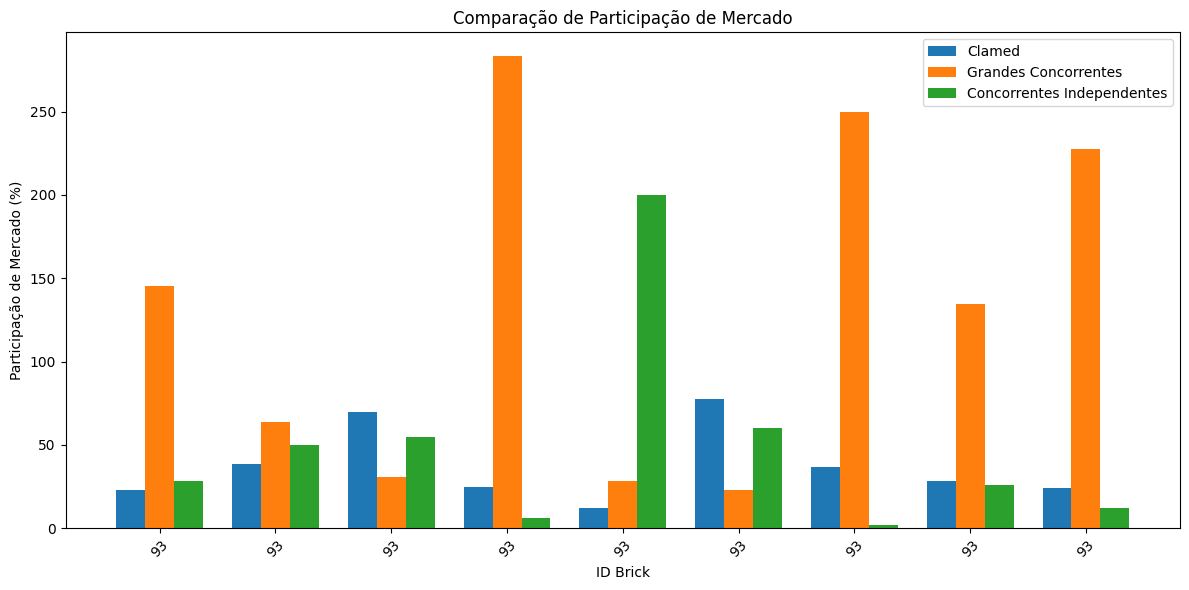

In [ ]:
x = np.arange(len(merged_by_idbrick))
width = 0.25
plt.figure(figsize=(12, 6))

plt.bar(x - width, merged_by_idbrick['participacao_mercado_clamed'], width, label='Clamed')
plt.bar(x, merged_by_idbrick['participacao_mercado_grandes_concorr'], width, label='Grandes Concorrentes')
plt.bar(x + width, merged_by_idbrick['participacao_mercado_concorr_indep'], width, label='Concorrentes Independentes')

plt.xlabel('ID Brick')
plt.ylabel('Participação de Mercado (%)')
plt.title('Comparação de Participação de Mercado')
plt.xticks(x, merged_by_idbrick['id_brick'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

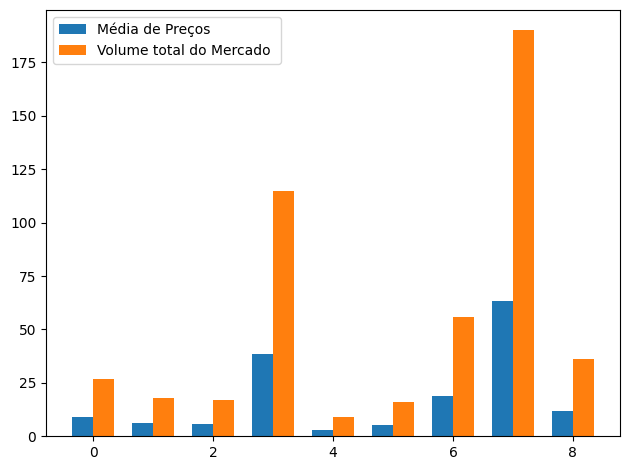

In [ ]:
x = np.arange(len(merged_by_idbrick))
width = 0.35

plt.bar(x - width/2, merged_by_idbrick['media_precos'], width, label='Média de Preços')
plt.bar(x + width/2, merged_by_idbrick['volume_total_mercado'], width, label='Volume total do Mercado ')

plt.legend()
plt.tight_layout()
plt.show()
